# **Project: Laptop prices (Linear Regression)**

The goal of this analysis is to identify the features that most affect the price of a laptop using linear regression. 

The dataset being used contains a set of specifications plus the price of each laptop device, and was downloaded from Kaggle (https://www.kaggle.com/datasets/ironwolf437/laptop-price-dataset/data) under an Apache 2.0 license.

In [1]:
import pandas as pd
import numpy as np


### **Loading and previewing the data.**

In [2]:
df = pd.read_csv("laptop.csv")

#Previewing the data
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


We want to know how many different laptops are included in the dataset, as well as the different features that are included.

In [3]:
print(len(df))
print(df.columns)

1275
Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')


We ask for the summary statistics for this data set.

In [4]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


### **Cleaning the data.**

We will be performing a Linear Regression on this dataset. We can therefore remove any columns that do not consist of continuous data (apart from those that give a direct description of the product).

In [5]:
columns_to_remove = ["ScreenResolution", "CPU_Company", "CPU_Type", "Memory", "GPU_Company", "GPU_Type", "OpSys"]
df.drop(labels=columns_to_remove, axis=1, inplace=True)

We want to merge the columns "Company",	"Product", "TypeName" into one single columnn "Laptop".

In [6]:
df["Laptop"] = df["Company"].astype(str) + " " + df["Product"].astype(str) + " " + df["TypeName"].astype(str)

#Removing unnecessary columns
df.drop(labels=["Company", "Product", "TypeName"], axis=1, inplace=True)
#Moving laptop column to first column in dataframe

laptop_col = df.pop("Laptop")  # Remove the column
df.insert(0, "Laptop", laptop_col)  # Insert it at the front


We need to check whether our dataset contains any missing values.

In [7]:
df.isna().any()

Laptop                 False
Inches                 False
CPU_Frequency (GHz)    False
RAM (GB)               False
Weight (kg)            False
Price (Euro)           False
dtype: bool

There are no missing values in our dataset.

### **Exploring the data.**

We want to investigate which features of the Laptop correlate to its price.

In [8]:
# Selecting numeric columns (ignore categorical columns i.e. "Laptop")
numeric_df = df.select_dtypes(include=[float, int])

# Computing correlation on numeric data
correlation = numeric_df.corr()
correlation

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
Inches,1.000000,0.305037,0.241078,0.826638,0.066608
CPU_Frequency (GHz),0.305037,1.000000,0.366254,0.318649,0.428847
RAM (GB),0.241078,0.366254,1.000000,0.389370,0.740287
Weight (kg),0.826638,0.318649,0.389370,1.000000,0.211883
Price (Euro),0.066608,0.428847,0.740287,0.211883,1.000000


From the table of correlation coefficients, we see that:
- There is a moderately positive relationship between Price (Euro) and CPU_Frequency (GHz)
- There is a strong positive relationship between Price (Euro) and RAM (GB).

### **Visualising the data.**

We will create scatter plots for the following variables to visualise these relationships:
- Price (Euro) and CPU_Frequency (GHz)
- Price (Euro) and RAM (GB)

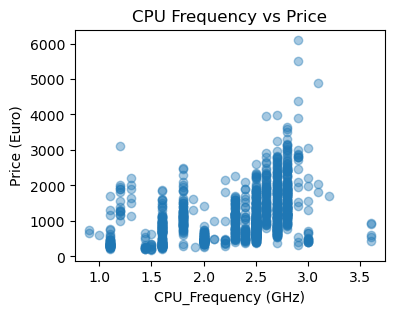

In [30]:
from matplotlib import pyplot as plt

plt.figure(figsize=(4, 3))

plt.scatter(df["CPU_Frequency (GHz)"],df["Price (Euro)"],alpha=0.4)
plt.xlabel("CPU_Frequency (GHz)")
plt.ylabel("Price (Euro)")
plt.title("CPU Frequency vs Price")
plt.show()

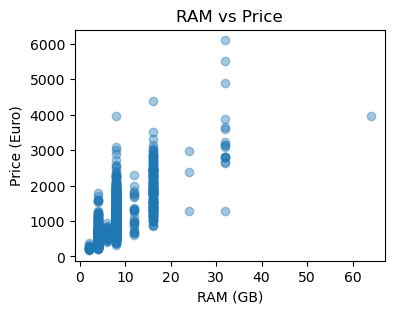

In [29]:
plt.figure(figsize=(4, 3))

plt.scatter(df["RAM (GB)"],df["Price (Euro)"],alpha=0.4)
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euro)")
plt.title("RAM vs Price")
plt.show()

### **Selecting the data.**

We will create a list of the features (CPU Frequency and RAM) that have the strongest correlations with the price, since this is the data that will be inserted into our Linear Regression model.

In [11]:
features = df[["CPU_Frequency (GHz)", "RAM (GB)"]]

### **Training and testing sets.**

We need to break our data into a training set (which trains the model) and a test set (which checks whether the model is performing well). We can use scikit-learn's *train_test_split* function to do so. We will train the model on 80% of the data, and use the other 20% to test the model.


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, df["Price (Euro)"], test_size = 0.2)

### **Creating and training the model.**

We will use the *linear_model* module from scikit-learn, fitting and training the module on our training data.

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### **Evaluating the model.**

We will firstly compute the coefficient of determination (R^2) for our model, first on the training data and then on the testing data.

This coefficient ranges from 0 to 1, and is a measure of how well a model fits a data set, where 1 is the best possible value.

In [15]:
model.score(X_train,y_train)

0.5965025525795634

In [16]:
model.score(X_test,y_test)

0.4917875276711776

The model is a moderate fit for both the training data and the testing data.

We can also use the model to predict prices from our testing data, and then compare these prices to the actual prices.

In [18]:
y_predicted = model.predict(X_test)

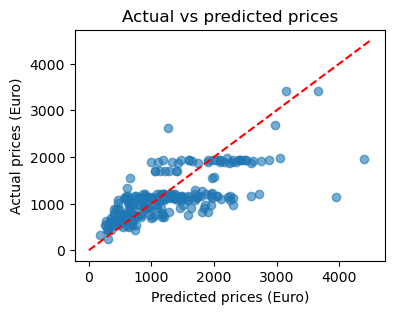

In [28]:
plt.figure(figsize=(4, 3))

plt.scatter(y_test,y_predicted, alpha = 0.6)
plt.xlabel("Predicted prices (Euro)")
plt.ylabel("Actual prices (Euro)")

plt.title("Actual vs predicted prices")

x_range = np.linspace(0, 4500, 100)
plt.plot(x_range, x_range, color='red', linestyle='--', label="y = x Line")

plt.show()

The plot also displays the *y = x* line. For a perfect linear regression model, the data would be plotted along this line. We observe that *some* of the data is plotted along this line, meaning that the model correctly predicted some of the prices. However, there are some large deviations from the line meaning that the model's predictions aren't entirely accurate. Furthermore, the deviation of the points from the line increase as the prices increase (i.e. the model exhibits heteroscedasticity). 

### **Future Projects.**

* Evaluate the impact of different combinations of features like Company, Memory, OpSys, etc.
* Improve model performance by using N-fold cross-validation.
* Build a web app where users can input laptop specs and receive a price prediction.